<a href="https://colab.research.google.com/github/Jasminekader/2024-LOKSABHA-ELECTION/blob/main/ELECTION_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOK SABHA ELECTION 2024 DATA ANALYSIS**


In [1]:
#IMPORTING LIBRARIES
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#SCRAPING
url ='https://results.eci.gov.in/PcResultGenJune2024/index.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
#EXTRACTING DATA
table = soup.find('table')
rows = table.find_all('tr')
data = []
for row in rows:
  cols = row.find_all('td')
  cols = [ele.text.strip() for ele in cols if ele.text.strip()]
  data.append(cols)



df = pd.DataFrame(data)
df.columns = ['Party', 'Won', 'Leading','Total']
df.to_excel('PARTY_RESULT.xlsx', sheet_name='Sheet1', index=False)
print(df)


                                                Party   Won Leading Total
0                                                None  None    None  None
1                        Bharatiya Janata Party - BJP   240       0   240
2                      Indian National Congress - INC    99       0    99
3                                Samajwadi Party - SP    37       0    37
4                 All India Trinamool Congress - AITC    29       0    29
5                     Dravida Munnetra Kazhagam - DMK    22       0    22
6                                  Telugu Desam - TDP    16       0    16
7                        Janata Dal  (United) - JD(U)    12       0    12
8      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT     9       0     9
9   Nationalist Congress Party – Sharadchandra Paw...     8       0     8
10                                    Shiv Sena - SHS     7       0     7
11             Lok Janshakti Party(Ram Vilas) - LJPRV     5       0     5
12      Yuvajana Sramika Rythu Congres

In [7]:
df = pd.read_excel('PARTY_RESULT.xlsx', sheet_name='Sheet1')
print(df)

                                                Party    Won  Leading  Total
0                                                 NaN    NaN      NaN    NaN
1                        Bharatiya Janata Party - BJP  240.0      0.0  240.0
2                      Indian National Congress - INC   99.0      0.0   99.0
3                                Samajwadi Party - SP   37.0      0.0   37.0
4                 All India Trinamool Congress - AITC   29.0      0.0   29.0
5                     Dravida Munnetra Kazhagam - DMK   22.0      0.0   22.0
6                                  Telugu Desam - TDP   16.0      0.0   16.0
7                        Janata Dal  (United) - JD(U)   12.0      0.0   12.0
8      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9.0      0.0    9.0
9   Nationalist Congress Party – Sharadchandra Paw...    8.0      0.0    8.0
10                                    Shiv Sena - SHS    7.0      0.0    7.0
11             Lok Janshakti Party(Ram Vilas) - LJPRV    5.0      0.0    5.0

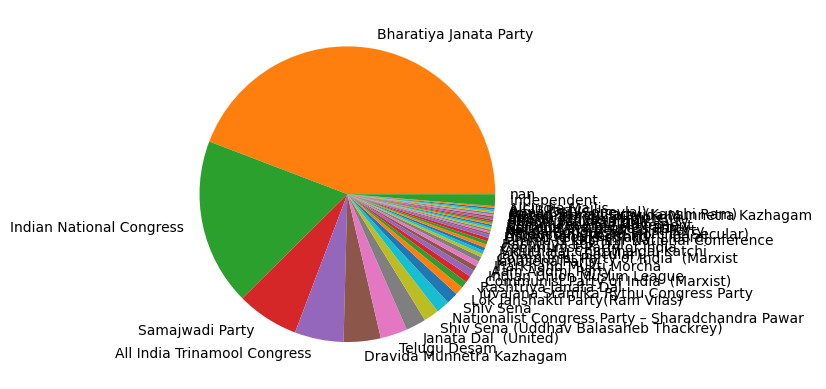

In [80]:
#VISUALIZING ALL WON PARTIES
df = pd.read_excel('PARTY_RESULT.xlsx', sheet_name='Sheet1')

df['Total'] = df['Total'].fillna(0)

df['Party'] = df['Party'].astype(str)

df['Party_Short'] = df['Party'].apply(lambda x: x.split('-')[0] if '-' in x else x)

plt.pie(df['Total'], labels=df['Party_Short'], shadow=False)
plt.show()


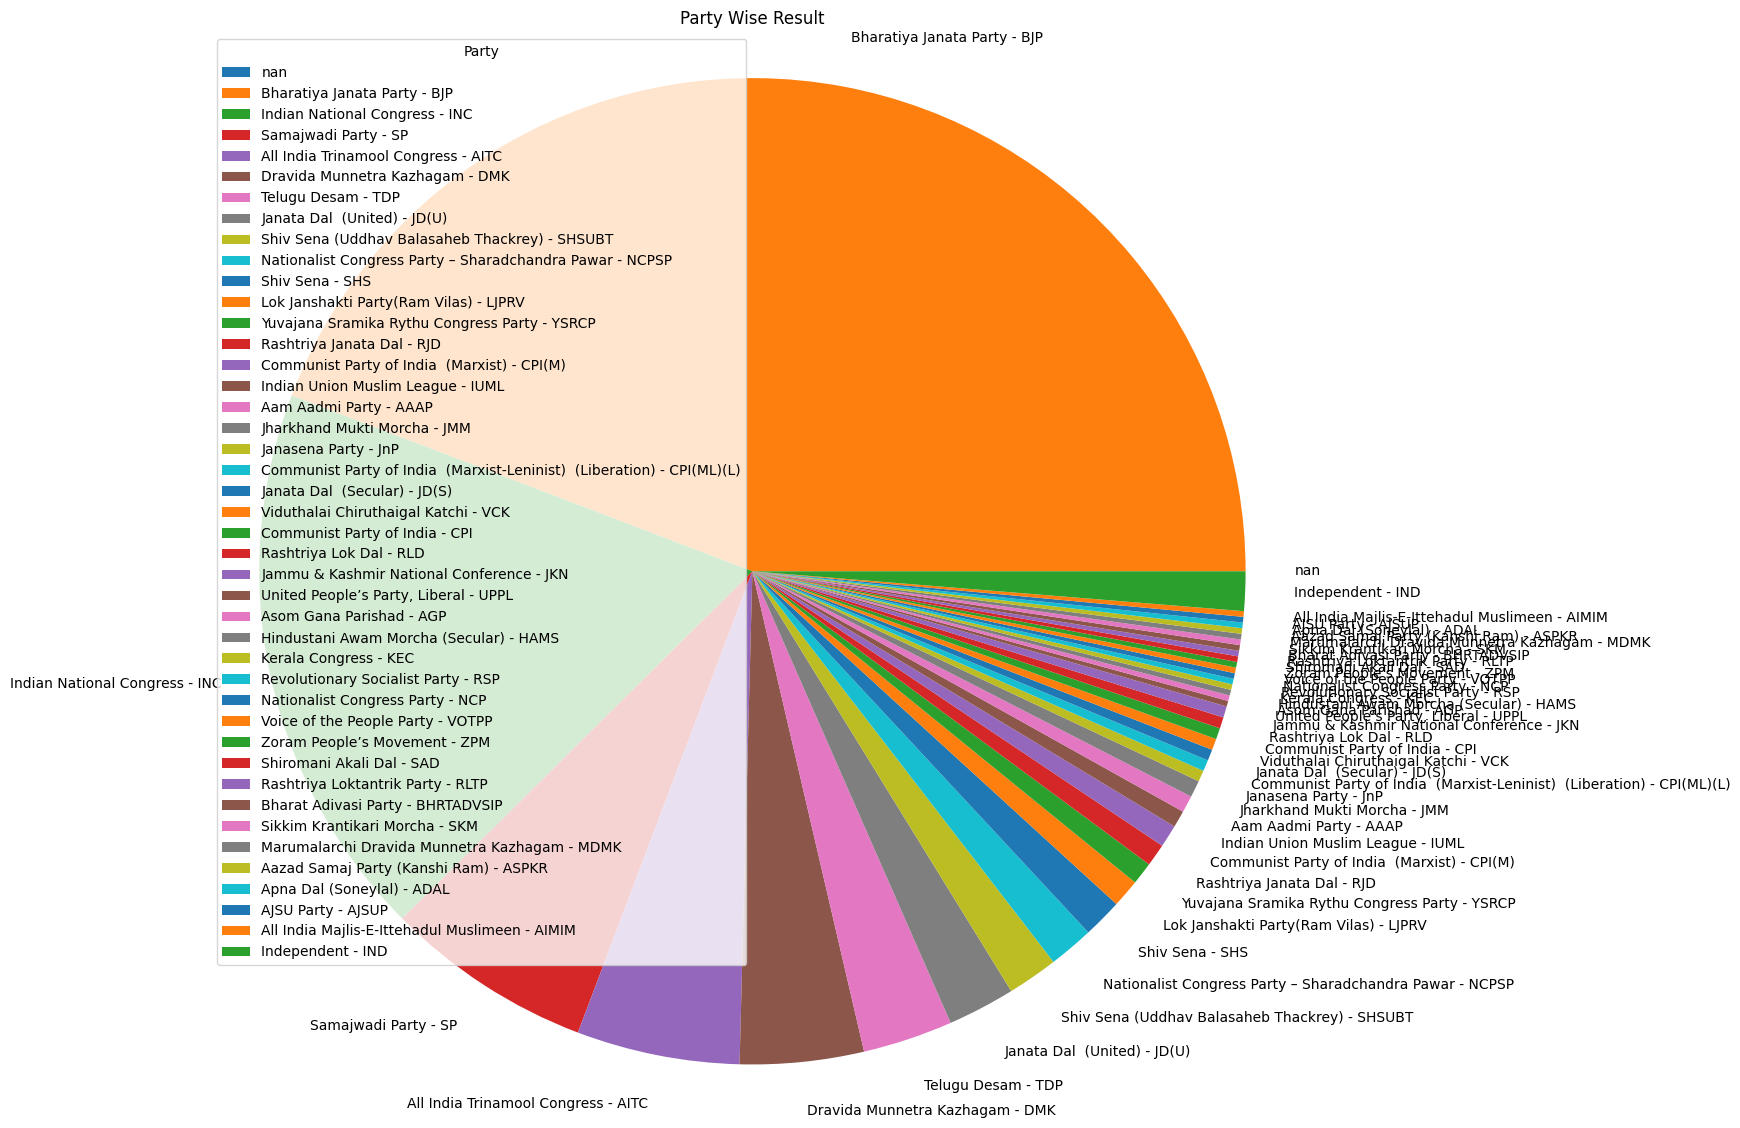

In [81]:
#VISULAIZING DATA [PARTY WISE RESULT] WITH LABELS
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df = df.dropna(subset=['Total'])
df['Total'] = df['Total'].astype(int)

mylabels = df['Party']

plt.figure(figsize=(14, 14))
plt.pie(df['Total'], labels=mylabels, shadow=False)
plt.axis('equal')
plt.title("Party Wise Result")
plt.legend(title = "Party")
plt.show()

<ipython-input-88-7dd6063938d5>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Won', y='Party', data=filtered_df, palette='viridis')


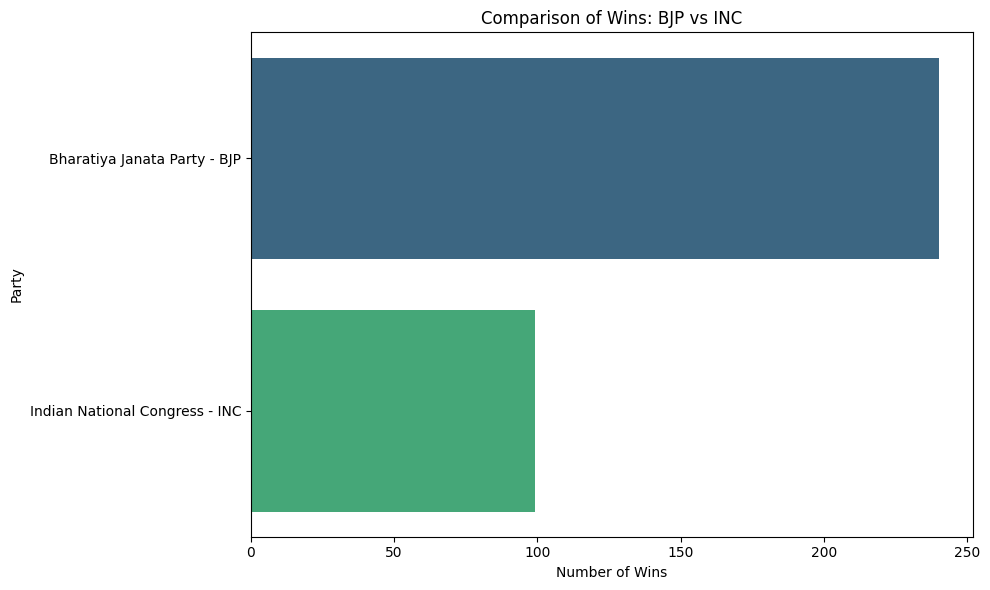

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame based on your provided data
data = {
    'Party': [
        'Bharatiya Janata Party - BJP', 'Indian National Congress - INC', 'Samajwadi Party - SP',
        'All India Trinamool Congress - AITC', 'Dravida Munnetra Kazhagam - DMK', 'Telugu Desam - TDP',
        'Janata Dal  (United) - JD(U)', 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
        'Nationalist Congress Party – Sharadchandra Pawar - NCP', 'Shiv Sena - SHS',
        'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Yuvajana Sramika Rythu Congress Party - YSRCP',
        'Rashtriya Janata Dal - RJD', 'Communist Party of India  (Marxist) - CPI(M)',
        'Indian Union Muslim League - IUML', 'Aam Aadmi Party - AAAP', 'Jharkhand Mukti Morcha - JMM',
        'Janasena Party - JnP', 'Communist Party of India  (Marxist-Leninist) - CPI(ML)',
        'Janata Dal  (Secular) - JD(S)', 'Viduthalai Chiruthaigal Katchi - VCK',
        'Communist Party of India - CPI', 'Rashtriya Lok Dal - RLD',
        'Jammu & Kashmir National Conference - JKN', 'United People’s Party, Liberal - UPPL',
        'Asom Gana Parishad - AGP', 'Hindustani Awam Morcha (Secular) - HAMS', 'Kerala Congress - KEC',
        'Revolutionary Socialist Party - RSP', 'Nationalist Congress Party - NCP',
        'Voice of the People Party - VOTPP', 'Zoram People’s Movement - ZPM',
        'Shiromani Akali Dal - SAD', 'Rashtriya Loktantrik Party - RLTP', 'Bharat Adivasi Party - BHRTADVSIP',
        'Sikkim Krantikari Morcha - SKM', 'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
        'Aazad Samaj Party (Kanshi Ram) - ASPKR', 'Apna Dal (Soneylal) - ADAL', 'AJSU Party - AJSUP',
        'All India Majlis-E-Ittehadul Muslimeen - AIMIM', 'Independent - IND'
    ],
    'Won': [
        240.0, 99.0, 37.0, 29.0, 22.0, 16.0, 12.0, 9.0, 8.0, 7.0, 5.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0,
        2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0
    ]
}

# Create DataFrame
df = pd.DataFrame(df)

# Filter data for BJP and INC
filtered_df = df[df['Party'].isin(['Bharatiya Janata Party - BJP', 'Indian National Congress - INC'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Won', y='Party', data=filtered_df, palette='viridis')
plt.title('Comparison of Wins: BJP vs INC')
plt.xlabel('Number of Wins')
plt.ylabel('Party')
plt.tight_layout()
plt.show()


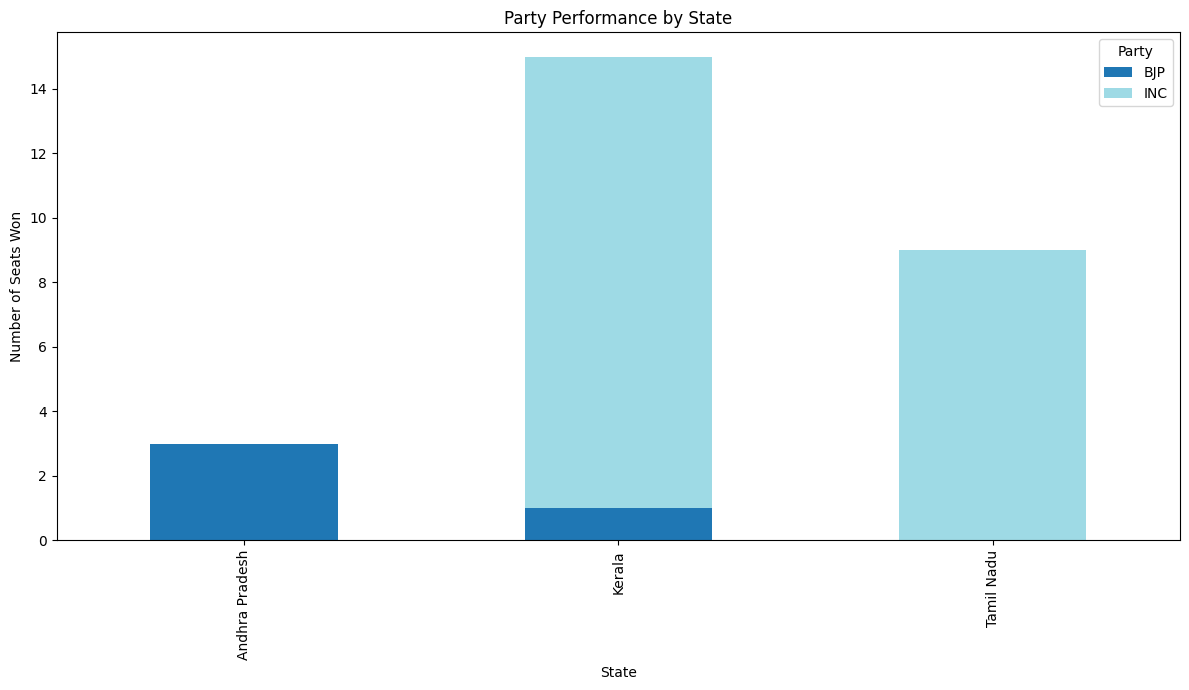

In [92]:
#data visualizing [comparingstates with parties (BJP,INC)]
data = {
    'State': ['Andhra Pradesh', 'Andhra Pradesh', 'Kerala', 'Kerala', 'Tamil Nadu', 'Tamil Nadu'],
    'Party': ['BJP', 'INC', 'BJP', 'INC', 'BJP', 'INC'],
    'Won': [3, 0, 1,14 , 0, 9]
}

df = pd.DataFrame(data)

pivot_df = df.pivot_table(index='State', columns='Party', values='Won', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Party Performance by State')
plt.xlabel('State')
plt.ylabel('Number of Seats Won')
plt.legend(title='Party')
plt.tight_layout()
plt.show()

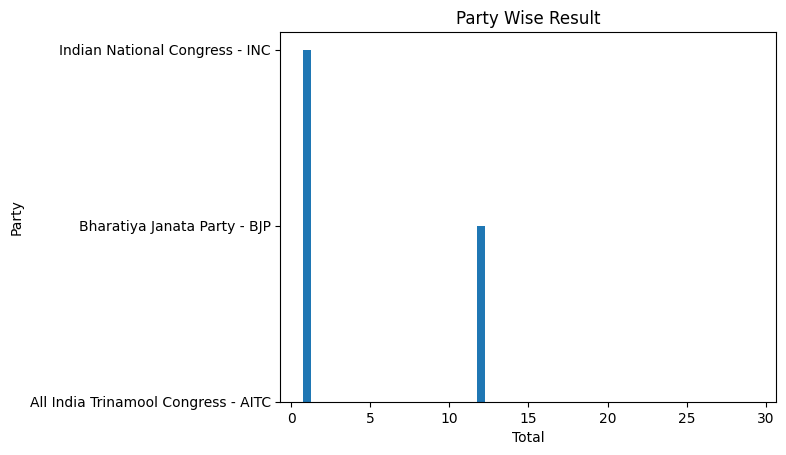

In [59]:
#VISUALIZING BAR PLOT [PARTY And TOTAL]
plt.bar(df['Total'], df['Party'],width = 0.5)
plt.xlabel('Total')
plt.ylabel('Party')
plt.title('Party Wise Result')
plt.show()

In [61]:
#EXTRACTING STATEWISE URL
options = soup.find_all('option')


for option in options:
  state_id = option['value']
  state_name = option.text.strip()


  state_url = f"{url[:-10]}/partywiseresult-{state_id}.htm"
  print(state_url)

https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm
https://r

In [30]:
#PARSING
soup = BeautifulSoup(html_content, 'html.parser')

select_element = soup.find('select')

options = select_element.find_all('option')


state_data = [{'Value': option.get('value'), 'State': option.get_text(strip=True)} for option in options if option.get('value')]


states_df = pd.DataFrame(state_data)

print("States DataFrame:")
print(states_df)


States DataFrame:
   Value                                 State
0    U01             Andaman & Nicobar Islands
1    S01                        Andhra Pradesh
2    S02                     Arunachal Pradesh
3    S03                                 Assam
4    S04                                 Bihar
5    U02                            Chandigarh
6    S26                          Chhattisgarh
7    U03  Dadra & Nagar Haveli and Daman & Diu
8    S05                                   Goa
9    S06                               Gujarat
10   S07                               Haryana
11   S08                      Himachal Pradesh
12   U08                     Jammu and Kashmir
13   S27                             Jharkhand
14   S10                             Karnataka
15   S11                                Kerala
16   U09                                Ladakh
17   U06                           Lakshadweep
18   S12                        Madhya Pradesh
19   S13                           Maharas

In [31]:
#SCRAPPING
def fetch_data_from_url(state_url):

    response = requests.get(state_url)


    if response.status_code == 200:

        soup = BeautifulSoup(response.text, 'html.parser')


        table = soup.find('table', class_='table')
        if table:

            headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]


            rows = []
            for tr in table.find('tbody').find_all('tr'):
                cells = tr.find_all('td')
                row = [cell.get_text(strip=True) for cell in cells]
                rows.append(row)


            df = pd.DataFrame(rows, columns=headers)
            return df
        else:
            print(f"No table found on the page for {state_url}.")
            return None
    else:
        print(f"Failed to fetch data from URL {state_url}. Status code: {response.status_code}")
        return None



urls = ['https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S27.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S10.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S11.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U09.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U06.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S12.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S13.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S14.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S15.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S16.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S17.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U05.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S18.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U07.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S19.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S20.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S21.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S22.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S29.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S23.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S28.htm',
'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S25.htm'
]

for url in urls:
    df= fetch_data_from_url(url)
    if df is not None:
        print(f"Data extracted from {url}:")
        print(df)
        print("-" * 50)



Data extracted from https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm:
                          Party Won Leading Total
0  Bharatiya Janata Party - BJP   1       0     1
--------------------------------------------------
Data extracted from https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm:
                                           Party Won Leading Total
0                             Telugu Desam - TDP  16       0    16
1  Yuvajana Sramika Rythu Congress Party - YSRCP   4       0     4
2                   Bharatiya Janata Party - BJP   3       0     3
3                           Janasena Party - JnP   2       0     2
--------------------------------------------------
Data extracted from https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm:
                          Party Won Leading Total
0  Bharatiya Janata Party - BJP   2       0     2
--------------------------------------------------
Data extracted from https://results.

In [32]:
#VISUALIZING
import os
def create_visualizations(df, state_code, plot_dir):
    """Create and save visualizations for the given DataFrame."""
    if df.empty:
        print(f"No data available for {state_code}.")
        return

    plt.figure(figsize=(12, 12))
    sns.barplot(x='Party', y='Won', data=df,width=0.5)
    plt.xticks(rotation=0)
    plt.title(f'Election Results - {state_code} (Won Seats)')
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/{state_code}_won_seats.png')
    plt.close()

    # Bar plot of Party vs Total seats
    plt.figure(figsize=(12, 12))
    sns.barplot(x='Party', y='Total', data=df,width=0.5)
    plt.xticks(rotation=0)
    plt.title(f'Election Results - {state_code} (Total Seats)')
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/{state_code}_total_seats.png')
    plt.close()


urls = [
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S27.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S10.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S11.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U09.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U06.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S12.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S13.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S14.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S15.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S16.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S17.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U05.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S18.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U07.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S19.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S20.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S21.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S22.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S29.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S23.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S28.htm',
    'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S25.htm'
]


plot_dir = 'plots'
os.makedirs(plot_dir, exist_ok=True)



dfs = {}


for url in urls:
    df = fetch_data_from_url(url)
    if df is not None:

        state_code = url.split('/')[-1].replace('.htm', '')
        dfs[state_code] = df

        create_visualizations(df, state_code, plot_dir)
        print(f"Data and visualizations created for {state_code}.")

Data and visualizations created for partywiseresult-U01.
Data and visualizations created for partywiseresult-S01.
Data and visualizations created for partywiseresult-S02.
Data and visualizations created for partywiseresult-S03.
Data and visualizations created for partywiseresult-S04.
Data and visualizations created for partywiseresult-U02.
Data and visualizations created for partywiseresult-S26.
Data and visualizations created for partywiseresult-U03.
Data and visualizations created for partywiseresult-S05.
Data and visualizations created for partywiseresult-S06.
Data and visualizations created for partywiseresult-S07.
Data and visualizations created for partywiseresult-S08.
Data and visualizations created for partywiseresult-U08.
Data and visualizations created for partywiseresult-S27.
Data and visualizations created for partywiseresult-S10.
Data and visualizations created for partywiseresult-S11.
Data and visualizations created for partywiseresult-U09.
Data and visualizations created

In [62]:
#FETCHING
dfs = {}

for url in urls:
    df = fetch_data_from_url(url)
    if df is not None:

        state_code = url.split('/')[-1].replace('.htm', '')
        dfs[state_code] = df
        print(f"Data fetched for {state_code}.")

Data fetched for partywiseresult-U01.
Data fetched for partywiseresult-S01.
Data fetched for partywiseresult-S02.
Data fetched for partywiseresult-S03.
Data fetched for partywiseresult-S04.
Data fetched for partywiseresult-U02.
Data fetched for partywiseresult-S26.
Data fetched for partywiseresult-U03.
Data fetched for partywiseresult-S05.
Data fetched for partywiseresult-S06.
Data fetched for partywiseresult-S07.
Data fetched for partywiseresult-S08.
Data fetched for partywiseresult-U08.
Data fetched for partywiseresult-S27.
Data fetched for partywiseresult-S10.
Data fetched for partywiseresult-S11.
Data fetched for partywiseresult-U09.
Data fetched for partywiseresult-U06.
Data fetched for partywiseresult-S12.
Data fetched for partywiseresult-S13.
Data fetched for partywiseresult-S14.
Data fetched for partywiseresult-S15.
Data fetched for partywiseresult-S16.
Data fetched for partywiseresult-S17.
Data fetched for partywiseresult-U05.
Data fetched for partywiseresult-S18.
Data fetched

In [63]:
#CREATING EXCEL SHEET
excel_file_path = 'election_results.xlsx'


with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='w') as writer:  # Use mode='w' to create a new file
    for state_code, df in dfs.items():
        df.to_excel(writer, sheet_name=state_code[:30], index=False)  # Sheet name max length is 31 chars

print(f"Data has been written to {excel_file_path}")

Data has been written to election_results.xlsx


In [52]:
#READING SHEET
election_results = pd.read_excel('election_results.xlsx', sheet_name=None)

for sheet_name, df in election_results.items():
    print(f"Data from sheet: {sheet_name}")
    print(df)
    print("-" * 50)

Data from sheet: partywiseresult-U01
                          Party  Won  Leading  Total
0  Bharatiya Janata Party - BJP    1        0      1
--------------------------------------------------
Data from sheet: partywiseresult-S01
                                           Party  Won  Leading  Total
0                             Telugu Desam - TDP   16        0     16
1  Yuvajana Sramika Rythu Congress Party - YSRCP    4        0      4
2                   Bharatiya Janata Party - BJP    3        0      3
3                           Janasena Party - JnP    2        0      2
--------------------------------------------------
Data from sheet: partywiseresult-S02
                          Party  Won  Leading  Total
0  Bharatiya Janata Party - BJP    2        0      2
--------------------------------------------------
Data from sheet: partywiseresult-S03
                                   Party  Won  Leading  Total
0           Bharatiya Janata Party - BJP    9        0      9
1         Ind